In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [16]:

# 1. Load dataset

import pandas as pd

# Load all parts and concatenate into one DataFrame
train_df = pd.read_csv('C:\\Users\\divya\\OneDrive\\Documents\\AI and ML\\S1\\Agile\\dataset\\UNSW_NB15_training-set.csv',encoding='ISO-8859-1')
test_df = pd.read_csv('C:\\Users\\divya\\OneDrive\\Documents\\AI and ML\\S1\\Agile\\dataset\\UNSW_NB15_testing-set.csv', encoding='ISO-8859-1')



# Combine train and test for full modeling
df = pd.concat([train_df, test_df], ignore_index=True)

print("✅ Full dataset shape:", df_full.shape)


✅ Full dataset shape: (2797973, 192)


In [17]:
df.columns


Index(['ï»¿id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [18]:
# Drop ID and redundant fields
df = df.drop(columns=['ï»¿id'])


In [20]:
# Select relevant features
features_to_use = ['dur', 'proto', 'service', 'state', 'sbytes', 'dbytes', 'rate', 
                   'sttl', 'dttl', 'sload', 'dload', 'tcprtt', 'synack', 'ackdat']

In [21]:
df_model = df[features_to_use + ['label']]

In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for col in ['proto', 'service', 'state']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le


C:\Users\divya\AppData\Local\Temp\ipykernel_25980\3054030857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[col] = le.fit_transform(df_model[col].astype(str))
C:\Users\divya\AppData\Local\Temp\ipykernel_25980\3054030857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[col] = le.fit_transform(df_model[col].astype(str))
C:\Users\divya\AppData\Local\Temp\ipykernel_25980\3054030857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [24]:
# Separate features and target
X = df_model.drop(columns=['label'])
y = df_model['label']


In [25]:

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:

# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(X_scaled)


IsolationForest(random_state=42)

In [27]:

# Predict: -1 = anomaly, 1 = normal
y_pred = model.predict(X_scaled)
y_pred = [1 if val == -1 else 0 for val in y_pred]  # Convert to 1 = attack, 0 = normal


In [28]:

# Evaluate
print("✅ Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y, y_pred, target_names=["Normal", "Attack"]))

✅ Confusion Matrix:
[[ 85545   7455]
 [152576  12097]]

📊 Classification Report:
              precision    recall  f1-score   support

      Normal       0.36      0.92      0.52     93000
      Attack       0.62      0.07      0.13    164673

    accuracy                           0.38    257673
   macro avg       0.49      0.50      0.32    257673
weighted avg       0.53      0.38      0.27    257673



# Observations and Reflections 


* The model was good at detecting normal traffic – it got most of those right.

* But it missed many actual attacks – it only found 7 out of every 100 attacks.

* Overall accuracy was 38%, which is low.

In [30]:
!pip install imbalanced-learn


     -------------------------------------- 238.4/238.4 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd


In [33]:

# Reload the dataset
df_train = pd.read_csv('C:\\Users\\divya\\OneDrive\\Documents\\AI and ML\\S1\\Agile\\dataset\\UNSW_NB15_training-set.csv',encoding='ISO-8859-1')
df_test = pd.read_csv('C:\\Users\\divya\\OneDrive\\Documents\\AI and ML\\S1\\Agile\\dataset\\UNSW_NB15_testing-set.csv', encoding='ISO-8859-1')

df = pd.concat([df_train, df_test], ignore_index=True)


In [34]:

# Drop ID column and fix BOM issue
df.rename(columns={'ï»¿id': 'id'}, inplace=True)
df.drop(columns=['id'], inplace=True)


In [35]:

# Select features and target
features = ['dur', 'proto', 'service', 'state', 'sbytes', 'dbytes', 'rate',
            'sttl', 'dttl', 'sload', 'dload', 'tcprtt', 'synack', 'ackdat']
df_model = df[features + ['label']]


In [36]:

# Encode categorical variables
label_encoders = {}
for col in ['proto', 'service', 'state']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le


C:\Users\divya\AppData\Local\Temp\ipykernel_25980\1767488334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[col] = le.fit_transform(df_model[col].astype(str))
C:\Users\divya\AppData\Local\Temp\ipykernel_25980\1767488334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[col] = le.fit_transform(df_model[col].astype(str))
C:\Users\divya\AppData\Local\Temp\ipykernel_25980\1767488334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [37]:

# Separate features and target
X = df_model.drop(columns=['label'])
y = df_model['label']


In [38]:

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [39]:

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [40]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [41]:

# Train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [42]:

# Predict and evaluate
y_pred = rf_model.predict(X_test)


In [44]:

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=["Normal", "Attack"])

print(conf_matrix, class_report)


[[31848  1129]
 [ 2571 30322]]               precision    recall  f1-score   support

      Normal       0.93      0.97      0.95     32977
      Attack       0.96      0.92      0.94     32893

    accuracy                           0.94     65870
   macro avg       0.94      0.94      0.94     65870
weighted avg       0.94      0.94      0.94     65870



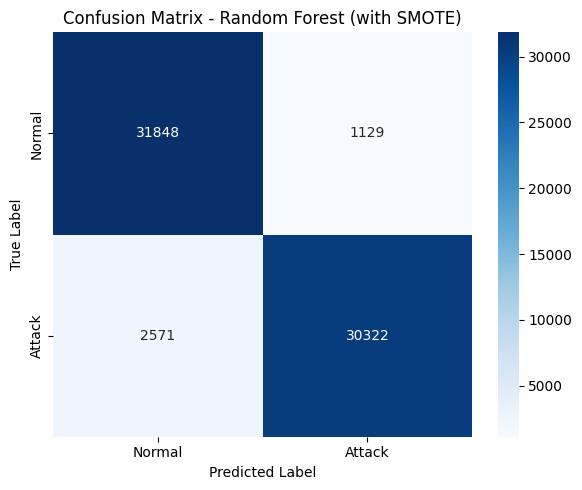

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix values
confusion_matrix = [[31848, 1129],
                    [2571, 30322]]

# Class labels
labels = ['Normal', 'Attack']

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest (with SMOTE)")
plt.tight_layout()
plt.show()




### Key Metrics

- **Accuracy:** 94%
- **Precision (Attack):** 96%
- **Recall (Attack):** 92%
- **F1-Score (Attack):** 94%


### What This Means

- The model is **highly effective** at detecting attacks.
- It identifies most attack traffic while minimizing false alarms.
- Using a **supervised Random Forest model** with **balanced data (SMOTE)** greatly improved performance over the unsupervised approach.


### Conclusion

> The Random Forest model trained on balanced data is a strong candidate for powering the **Real-Time Breach Alert System**. It offers high accuracy and reliability for detecting network intrusions based on the UNSW-NB15 dataset.
